# Description of Dataset

When you’ve been devastated by a serious car accident, your focus is on the things that matter the most: family, friends,
and other loved ones. Pushing paper with your insurance agent is the last place you want your time or mental energy
spent. This is why Allstate, a personal insurer in the United States, is continually seeking fresh ideas to improve
their claims service for the over 16 million households they protect.

Allstate is currently developing automated methods of predicting the cost, and hence severity, of claims. In this
recruitment challenge, Kagglers are invited to show off their creativity and flex their technical chops by creating an 
algorithm which accurately predicts claims severity. Aspiring competitors will demonstrate insight into better ways to 
predict claims severity for the chance to be part of Allstate’s efforts to ensure a worry-free customer experience.

In [1]:
#Importing the necessary libraries for data manipulation
import numpy as np
import pandas as pd

#Importing for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Importing packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#One hot encode categorical data--Convert to dummy
from sklearn.preprocessing import OneHotEncoder 

#Scale numeric data
from sklearn.preprocessing import StandardScaler

#Display outputs of all commands from a cell--not just of the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Import warnings module
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv('C:\\Users\\Anushka Goel\\Desktop\\AllState\\train.csv')
test = pd.read_csv('C:\\Users\\Anushka Goel\\Desktop\\AllState\\test.csv')

# DATA EXPLORATION

In [3]:
train.shape
test.shape

(188318, 132)

(125546, 131)

In [4]:
train.columns
test.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11',
       'cont12', 'cont13', 'cont14'],
      dtype='object', length=131)

In [5]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [6]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [7]:
train.dtypes
test.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
           ...   
cont11    float64
cont12    float64
cont13    float64
cont14    float64
loss      float64
Length: 132, dtype: object

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
           ...   
cont10    float64
cont11    float64
cont12    float64
cont13    float64
cont14    float64
Length: 131, dtype: object

In [8]:
train.dtypes.value_counts() 
test.dtypes.value_counts() 

object     116
float64     15
int64        1
dtype: int64

object     116
float64     14
int64        1
dtype: int64

In [9]:
train.nunique()
test.nunique()

id        188318
cat1           2
cat2           2
cat3           2
cat4           2
           ...  
cont11       326
cont12       328
cont13       353
cont14     18740
loss      158223
Length: 132, dtype: int64

id        125546
cat1           2
cat2           2
cat3           2
cat4           2
           ...  
cont10       169
cont11       314
cont12       315
cont13       355
cont14     16673
Length: 131, dtype: int64

# DATA PRE PROCESSING

In [10]:
train.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

In [11]:
test.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
Length: 131, dtype: int64

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64


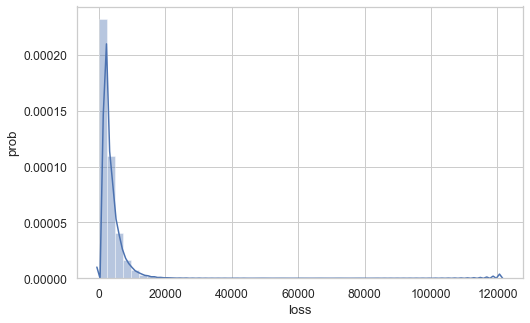

In [12]:
#To show the skewness of the data
print(train['loss'].describe())
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(train['loss'], norm_hist=False, kde=True).set(xlabel='loss', ylabel='prob');

In [13]:
train.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
           ...   
cont11    float64
cont12    float64
cont13    float64
cont14    float64
loss      float64
Length: 132, dtype: object

In [14]:
#checking for outliers

percent_outliers = sum(train['loss']>20000)/len(train['loss'])*100
print('Loss less than 20000 accounts for {0:.2f}% of data'.format(percent_outliers))

Loss less than 20000 accounts for 0.23% of data


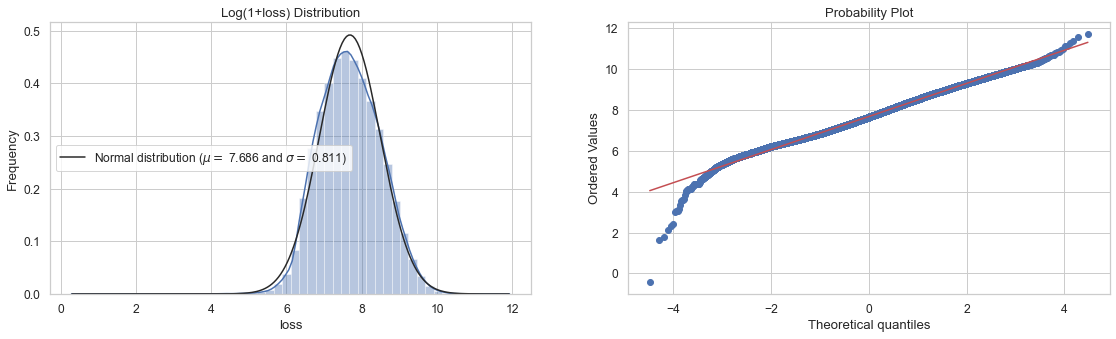

In [15]:
from scipy.stats import norm
from scipy import stats

(mu, sigma) = norm.fit(np.log1p(train['loss']))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(np.log1p(train['loss']) , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Log(1+loss) Distribution')
ax2 = stats.probplot(np.log(train['loss']), plot=plt)
f.show();

In [16]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


<Figure size 720x576 with 0 Axes>

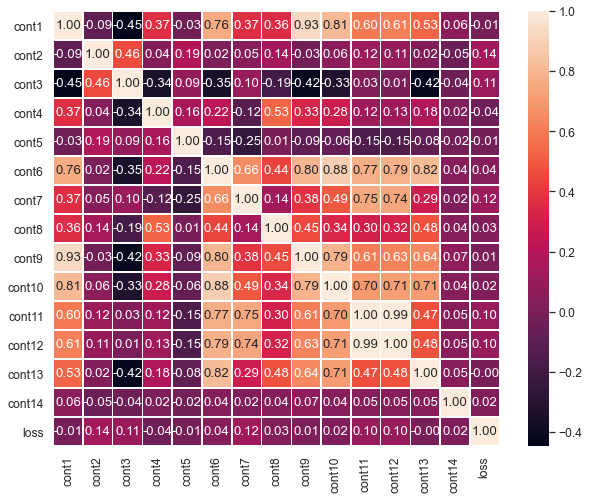

In [17]:
corr = train.drop(columns='id').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5)

cols = train.columns
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(10, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=train, ax=ax[j])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C313E2A60>,
      dtype=object)

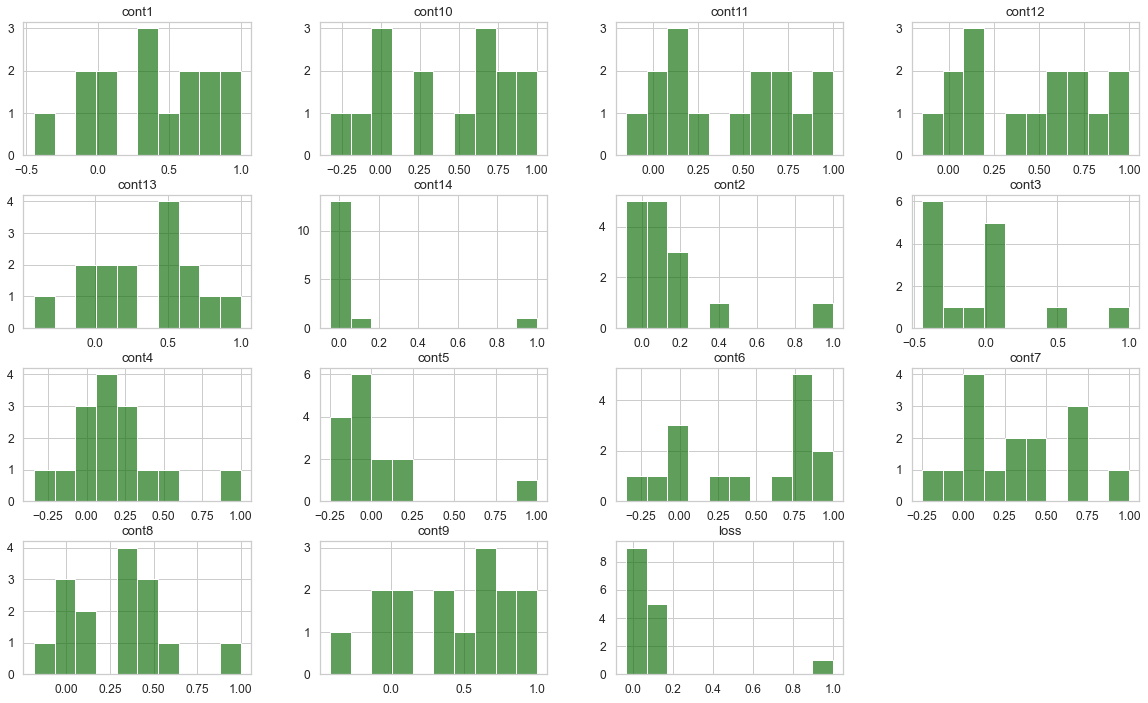

In [18]:
corr.hist(figsize=(20,12), color="#107009AA")
plt.show()

In [19]:
corr.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
cont1,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688,-0.010237
cont2,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584,0.141528
cont3,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592,0.111053
cont4,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445,-0.035831
cont5,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638,-0.011355


In [20]:
train_cat = train.iloc[:, 1:117]
train_cont = train.iloc[:, 117:-1]

In [21]:
high_corr= []
threshold = 0.8
for i in range(len(corr)):
    for j in range(i+1, len(corr)):
        if corr.iloc[i,j] >= threshold or (corr.iloc[i, j]<=-threshold and corr.iloc[i, j] < 0):
            high_corr.append([corr.iloc[i,j], i, j])

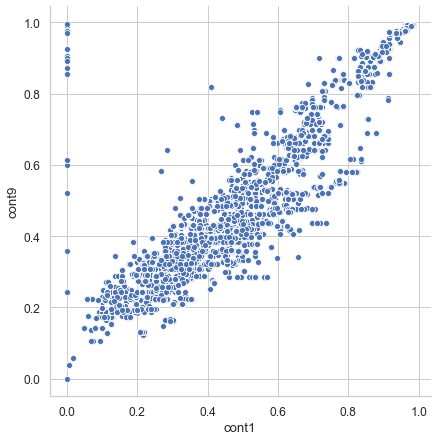

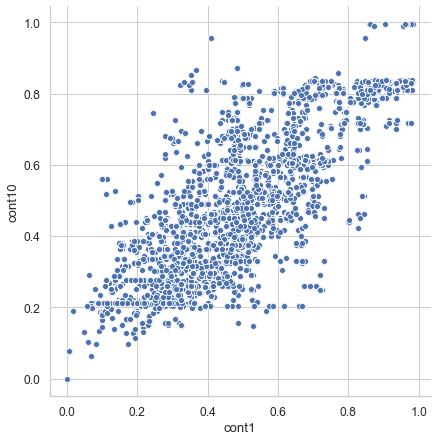

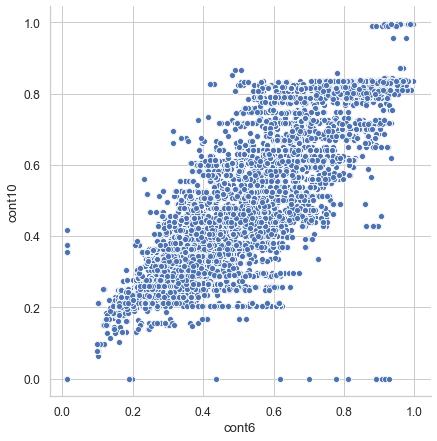

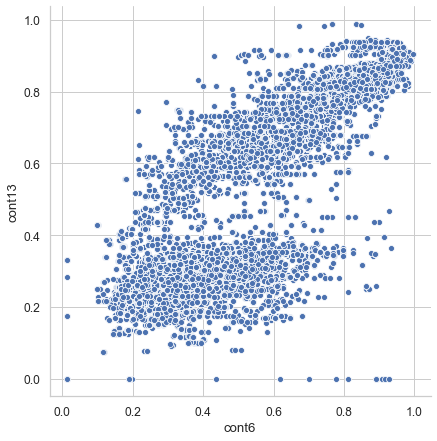

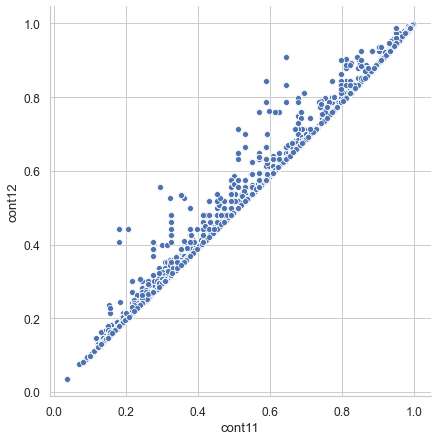

In [22]:
for v, i, j in high_corr:
    sns.pairplot(train_cont, x_vars=train_cont.columns[i], y_vars=train_cont.columns[j], size= 6)

# Feature Engineering

In [23]:
train.shape

(188318, 132)

In [24]:
test.shape

(125546, 131)

In [25]:
#to obtain all numeric columns in train data set
numeric_train = [col for col in train.columns[1:] if train[col].dtypes!='object']
print('numeric columns are:',numeric_train)
#to obtain all categorical columns in train data set
categorical_train = [col for col in train.columns if train[col].dtypes=='object']
print('categorical columns are:',categorical_train)

numeric columns are: ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']
categorical columns are: ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'ca

In [26]:
#to obtain all numeric columns in test data set
numeric_test = [col for col in test.columns[1:] if test[col].dtypes!='object']
print('numeric columns are:',numeric_test)
#to obtain all categorical columns in test data set
categorical_test = [col for col in test.columns if test[col].dtypes=='object']
print('categorical columns are:',categorical_test)

numeric columns are: ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14']
categorical columns are: ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'c

In [27]:
# Standard Scaler Train

ss = StandardScaler()
ntrain = ss.fit_transform(train[numeric_train])

In [28]:
# Standard Scaler Test

ss = StandardScaler()
ntest = ss.fit_transform(test[numeric_test])

In [29]:
ntrain=pd.DataFrame(ntrain,columns=['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss'])

In [30]:
ntrain.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1.238750,-1.260936,-1.540471,1.409553,-0.848538,1.107908,-0.840070,-0.922092,1.023032,1.813218,0.363476,0.484637,1.547892,0.984894,-0.283793
1,-0.870537,1.109451,0.463932,0.578923,1.906010,-0.253457,-0.271142,0.573972,-0.738944,-0.316748,-0.739973,-0.605672,0.555951,-0.859471,-0.603888
2,-1.236521,-0.718477,-0.072846,-1.206334,-0.432284,-0.980633,-0.949428,-1.069556,-1.237183,-0.933986,-0.534544,-0.571688,-1.397844,1.252694,-0.011104
3,-0.918075,0.234524,0.143849,-0.558452,-0.311730,-0.243577,-0.525875,-0.845049,-0.904033,-0.287266,-0.789545,-0.819289,0.526089,0.480590,-0.722256
4,-1.175963,-1.675658,0.143849,-0.088079,1.037383,-1.523596,-1.331256,-1.207792,-1.456660,-1.537399,-1.377084,-1.389213,-1.161437,-0.283662,-0.094174


In [31]:
ntest=pd.DataFrame(ntest,columns=['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'])

In [32]:
ntest.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,-0.919627,-1.004841,-1.245845,-0.424126,-0.987465,-0.124516,-0.941866,0.625858,-0.781654,-0.638611,-0.554358,-0.590894,0.980571,-0.462796
1,0.746364,0.550513,0.773525,2.154891,1.667974,-0.047492,-0.236131,1.132050,0.180553,0.565214,0.925292,0.864759,-0.195290,-1.291669
2,-1.083390,1.112616,1.055311,-0.377322,1.104120,-1.361463,-0.896536,-0.951251,-0.781654,-1.041248,-1.183234,-1.200858,-1.109770,-0.891030
3,-1.201452,0.845220,0.468046,-0.651952,-0.433108,-0.594719,-0.803751,-0.436589,-0.843587,-0.990105,-0.691512,-0.724068,0.456008,0.271185
4,0.316018,-1.004841,-1.163270,0.970233,-0.884485,-0.453981,-0.526796,-1.255437,-0.267415,0.035767,-0.640633,-0.674678,-0.908232,1.483465


In [33]:
train = train[train.columns[train.columns.isin(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116'])]]
train = pd.concat([train,ntrain],axis=1)
test = test[test.columns[test.columns.isin(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116'])]]
test = pd.concat([test,ntest],axis=1)

In [34]:
train.head()
test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,...,1.107908,-0.840070,-0.922092,1.023032,1.813218,0.363476,0.484637,1.547892,0.984894,-0.283793
1,A,B,A,A,A,A,A,A,B,B,...,-0.253457,-0.271142,0.573972,-0.738944,-0.316748,-0.739973,-0.605672,0.555951,-0.859471,-0.603888
2,A,B,A,A,B,A,A,A,B,B,...,-0.980633,-0.949428,-1.069556,-1.237183,-0.933986,-0.534544,-0.571688,-1.397844,1.252694,-0.011104
3,B,B,A,B,A,A,A,A,B,A,...,-0.243577,-0.525875,-0.845049,-0.904033,-0.287266,-0.789545,-0.819289,0.526089,0.480590,-0.722256
4,A,B,A,B,A,A,A,A,B,B,...,-1.523596,-1.331256,-1.207792,-1.456660,-1.537399,-1.377084,-1.389213,-1.161437,-0.283662,-0.094174


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,A,B,A,A,A,A,A,A,B,A,...,-0.987465,-0.124516,-0.941866,0.625858,-0.781654,-0.638611,-0.554358,-0.590894,0.980571,-0.462796
1,A,B,A,B,A,A,A,A,B,A,...,1.667974,-0.047492,-0.236131,1.132050,0.180553,0.565214,0.925292,0.864759,-0.195290,-1.291669
2,A,B,A,B,B,A,B,A,B,B,...,1.104120,-1.361463,-0.896536,-0.951251,-0.781654,-1.041248,-1.183234,-1.200858,-1.109770,-0.891030
3,A,A,A,A,B,A,A,A,A,A,...,-0.433108,-0.594719,-0.803751,-0.436589,-0.843587,-0.990105,-0.691512,-0.724068,0.456008,0.271185
4,B,A,A,A,A,B,A,A,A,A,...,-0.884485,-0.453981,-0.526796,-1.255437,-0.267415,0.035767,-0.640633,-0.674678,-0.908232,1.483465


In [35]:
#OneHotEncoding - converting categorical columns to dummy variables
columnsToEncode = train.select_dtypes(include=[object]).columns
train = pd.get_dummies(train, columns=columnsToEncode, drop_first=False)
test = pd.get_dummies(test, columns=columnsToEncode, drop_first=False)

In [36]:
train.head()
test.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,1.238750,-1.260936,-1.540471,1.409553,-0.848538,1.107908,-0.840070,-0.922092,1.023032,1.813218,...,0,0,0,0,0,0,0,0,0,0
1,-0.870537,1.109451,0.463932,0.578923,1.906010,-0.253457,-0.271142,0.573972,-0.738944,-0.316748,...,0,0,0,0,0,0,0,0,0,0
2,-1.236521,-0.718477,-0.072846,-1.206334,-0.432284,-0.980633,-0.949428,-1.069556,-1.237183,-0.933986,...,0,0,0,0,0,0,0,0,0,0
3,-0.918075,0.234524,0.143849,-0.558452,-0.311730,-0.243577,-0.525875,-0.845049,-0.904033,-0.287266,...,0,0,0,0,0,0,0,0,0,0
4,-1.175963,-1.675658,0.143849,-0.088079,1.037383,-1.523596,-1.331256,-1.207792,-1.456660,-1.537399,...,0,0,0,0,0,0,0,0,0,0


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cat116_MW,cat116_MX,cat116_N,cat116_O,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_Y
0,-0.919627,-1.004841,-1.245845,-0.424126,-0.987465,-0.124516,-0.941866,0.625858,-0.781654,-0.638611,...,0,0,0,0,0,0,0,0,0,0
1,0.746364,0.550513,0.773525,2.154891,1.667974,-0.047492,-0.236131,1.132050,0.180553,0.565214,...,0,0,0,0,0,0,0,0,0,0
2,-1.083390,1.112616,1.055311,-0.377322,1.104120,-1.361463,-0.896536,-0.951251,-0.781654,-1.041248,...,0,0,0,0,0,0,0,0,0,0
3,-1.201452,0.845220,0.468046,-0.651952,-0.433108,-0.594719,-0.803751,-0.436589,-0.843587,-0.990105,...,0,0,0,0,0,0,0,0,0,0
4,0.316018,-1.004841,-1.163270,0.970233,-0.884485,-0.453981,-0.526796,-1.255437,-0.267415,0.035767,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [37]:
from sklearn.model_selection import train_test_split
train['loss'] = np.log1p(train['loss'])
X, y = train.drop(['loss'], axis=1), train['loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=118)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150654, 1153) (37664, 1153) (150654,) (37664,)


In [38]:
y_train = pd.DataFrame(y_train)

In [54]:
y_test = pd.DataFrame(y_test)

In [39]:
y_train.head()

,loss
15197,0.492759
177132,0.368678
185859,1.023596
41919,0.816544
147578,-1.349765


In [40]:
values = {'loss': np.mean(y_train['loss'])}


y_train = y_train.fillna(value=values)



In [56]:
values = {'loss': np.mean(y_t['loss'])}


y_test = y_test.fillna(value=values)


In [41]:
y_train.shape

(150654, 1)

In [45]:

from sklearn.ensemble import RandomForestRegressor
rf_regressor_one = RandomForestRegressor()

In [46]:
# trainingresult_rf_1 = train_model(model = rf_regressor_one, num_folds = 3)
rf_regressor_one = RandomForestRegressor(n_jobs = -1,n_estimators = 50,max_depth = 30, verbose = 10 )

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rf_regressor_one.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50building tree 2 of 50
building tree 3 of 50

building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.6min


building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.0min


building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.2min


building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.9min


building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50building tree 38 of 50

building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.3min


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  8.8min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  9.1min remaining:   34.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 10.0min finished


RandomForestRegressor(max_depth=30, n_estimators=50, n_jobs=-1, verbose=10)

In [58]:
y_train_pred = rf_regressor_one.predict(X_train)
y_pred = rf_regressor_one.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse_rf = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse_rf:.4f}')
print(f'Test RMSE: {test_rmse_rf:.4f}')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done  41 out of  50 | elapsed:    4.3s remaining:    0.9s
[Parallel(n_jobs=8)]: Done  47 out of  50 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    4.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s


Train r2 score:  0.8270800527599841
Test r2 score:  0.5011638457517543
Train RMSE: 0.2990
Test RMSE: 0.6243


# Prediction

In [64]:


rf_pred = rf_regressor_one.predict(test)

rf_pred

rf_pred = pd.DataFrame(rf_pred)

rf_pred.tail()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done  41 out of  50 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  47 out of  50 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    1.2s finished


array([-0.50970519, -1.28447353, -0.08497731, ..., -0.54490741,
        0.29921315, -0.41104675])

,0
37659,-0.569254
37660,-0.677215
37661,-0.544907
37662,0.299213
37663,-0.411047
